Nama: Muhammad Sulthon Haqiqi

ID Dicoding: muhammad_haqiqi_01

email: muhammadhaqiqi97@gmail.com

1.  Bagaimana karakteristik dan perbandingan tren jumlah pengguna sepeda yang berbeda antara casual dan registered?
2.  Bagaimana tren jumlah total pengguna registered dan total pengguna registered per bulan?
3.  Bagaimana Pengaruh penggunaan bike sharing dengan musim?



In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
day_data = pd.read_csv("https://drive.google.com/uc?id=1IE9RG77efGT2eCQPPc999MJnJgj4E9oX")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
hour_data = pd.read_csv("https://drive.google.com/uc?id=1dFjFE8jUkhkJyh4-C8kTV5m71vdg52su")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [28]:
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [29]:
print("Jumlah duplikasi bike_day: ",day_data.duplicated().sum())
print("Jumlah duplikasi bike_hour: ",hour_data.duplicated().sum())

Jumlah duplikasi bike_day:  0
Jumlah duplikasi bike_hour:  0


In [30]:
total_bikehour = hour_data[['casual', 'registered', 'cnt']].sum()
print(total_bikehour)

total_bikeday = day_data[['casual', 'registered', 'cnt']].sum()
print(total_bikeday)

casual         620017
registered    2672662
cnt           3292679
dtype: int64
casual         620017
registered    2672662
cnt           3292679
dtype: int64


In [31]:
season_values = day_data['season'].unique()
print('Nilai unik untuk season =', season_values)

yr_values = day_data['yr'].unique()
print('Nilai unik untuk yr =', yr_values)

mnth_values = day_data['mnth'].unique()
print('Nilai unik untuk mnth =', mnth_values)

holiday_values = day_data['holiday'].unique()
print('Nilai unik untuk holiday =', holiday_values)

weekday_values = day_data['weekday'].unique()
print('Nilai unik untuk weekday =', weekday_values)

workingday_values = day_data['workingday'].unique()
print('Nilai unik untuk workingday =', workingday_values)

weathersit_values = day_data['weathersit'].unique()
print('Nilai unik untuk weathersit =', weathersit_values)

Nilai unik untuk season = [1 2 3 4]
Nilai unik untuk yr = [0 1]
Nilai unik untuk mnth = [ 1  2  3  4  5  6  7  8  9 10 11 12]
Nilai unik untuk holiday = [0 1]
Nilai unik untuk weekday = [6 0 1 2 3 4 5]
Nilai unik untuk workingday = [0 1]
Nilai unik untuk weathersit = [2 1 3]


In [32]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [33]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [34]:
day_data.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)

day_data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
day_data_drop = ['windspeed', 'weekday']
day_data.drop(day_data_drop, axis=1, inplace=True)

day_data.head()

,instant,dateday,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [36]:
day_data['dateday'] = pd.to_datetime(day_data['dateday'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 80.1 KB


In [37]:
day_data["season"] = day_data["season"].map(
    {
        1: "Spring",
        2: "Summer",
        3: "Fall",
        4: "Winter",
    }
)

day_data["weather"] = day_data["weather"].map(
    {
        1: "Clear",
        2: "Cloudy",
        3: "Light Rain",
        4: "Heavy Rain",
    }
)

day_data.head()

,instant,dateday,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,0,Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,Cloudy,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


In [38]:
day_data["weekday"] = day_data["dateday"].dt.day_name()

day_data["month"] = day_data["dateday"].dt.month_name()

day_data["year"] = day_data["dateday"].dt.year

day_data.head()

,instant,dateday,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,count,weekday
0,1,2011-01-01,Spring,2011,January,0,0,Cloudy,0.344167,0.363625,0.805833,331,654,985,Saturday
1,2,2011-01-02,Spring,2011,January,0,0,Cloudy,0.363478,0.353739,0.696087,131,670,801,Sunday
2,3,2011-01-03,Spring,2011,January,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349,Monday
3,4,2011-01-04,Spring,2011,January,0,1,Clear,0.200000,0.212122,0.590435,108,1454,1562,Tuesday
4,5,2011-01-05,Spring,2011,January,0,1,Clear,0.226957,0.229270,0.436957,82,1518,1600,Wednesday


In [39]:
day_data['temp'] = day_data['temp'] * 41
day_data['atemp'] = day_data['atemp'] * 50
day_data['hum'] = day_data['hum'] * 100

day_data.head()

,instant,dateday,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,count,weekday
0,1,2011-01-01,Spring,2011,January,0,0,Cloudy,14.110847,18.18125,80.5833,331,654,985,Saturday
1,2,2011-01-02,Spring,2011,January,0,0,Cloudy,14.902598,17.68695,69.6087,131,670,801,Sunday
2,3,2011-01-03,Spring,2011,January,0,1,Clear,8.050924,9.47025,43.7273,120,1229,1349,Monday
3,4,2011-01-04,Spring,2011,January,0,1,Clear,8.200000,10.60610,59.0435,108,1454,1562,Tuesday
4,5,2011-01-05,Spring,2011,January,0,1,Clear,9.305237,11.46350,43.6957,82,1518,1600,Wednesday


In [40]:
day_data.to_csv("cleaned_day_bike_data.csv", index=False)

In [41]:
users_type = day_data[["casual", "registered"]].sum()

users_type

,0
casual,620017
registered,2672662


In [42]:
day_data['dateday'] = pd.to_datetime(day_data['dateday'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    int32         
 4   month       731 non-null    object        
 5   holiday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  count       731 non-null    int64         
 14  weekday     731 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(6), object(4)
memory usa

In [43]:
summary = day_data[["casual", "registered"]].describe()

formatted_summary = summary.style.format("{:.0f}")

formatted_summary


,casual,registered
count,731,731
mean,848,3656
std,687,1560
min,2,20
25%,316,2497
50%,713,3662
75%,1096,4776
max,3410,6946


In [44]:
users_by_year = day_data.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_year = users_by_year.style.format("{:.0f}")
formatted_users_by_year

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [45]:
total_casual = day_data['casual'].sum()
total_registered = day_data['registered'].sum()
percentage_casual = (total_casual / (total_casual + total_registered)) * 100

percentage_registered = (total_registered / (total_casual + total_registered)) * 100

print("Persentase Pengguna Casual: {:.2f}%".format(percentage_casual))

print("Persentase Pengguna Registered: {:.2f}%".format(percentage_registered))


Persentase Pengguna Casual: 18.83%
Persentase Pengguna Registered: 81.17%


In [46]:
# Pengelompokkan data yang berdasarkan bulan dan menghitung total pengguna casual
users_by_month = day_data.groupby(by="month").agg({
   "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_month = users_by_month.style.format("{:.0f}")

formatted_users_by_month

sorted_users_by_month = users_by_month.sort_values(by=("count"), ascending=False)

sorted_users_by_month


,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


In [47]:
users_by_weekday = day_data.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})
formatted_users_by_weekday = users_by_weekday.style.format("{:.0f}")

formatted_users_by_weekday

sorted_users_by_weekday = users_by_weekday.sort_values(by=("count"), ascending=False)

sorted_users_by_weekday

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [48]:
users_by_workingday = day_data.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_workingday = users_by_workingday.style.format("{:.0f}")

formatted_users_by_workingday

sorted_users_by_workingday = users_by_workingday.sort_index(ascending=True)

sorted_users_by_workingday


,casual,registered,count
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [49]:
users_by_holiday = day_data.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_holiday = users_by_holiday.style.format("{:.0f}")

formatted_users_by_holiday

sorted_users_by_holiday = users_by_holiday.sort_index(ascending=True)

sorted_users_by_holiday


,casual,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [50]:
users_by_season = day_data.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_season = users_by_season.style.format("{:.0f}")

# Menampilkan hasil dengan format yang telah diformat
formatted_users_by_season

# Mengurutkan hasil berdasarkan total pengguna (count) secara menurun
sorted_users_by_season = users_by_season.sort_values(by="count", ascending=False)

# Menampilkan hasil pengurutan
sorted_users_by_season


,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


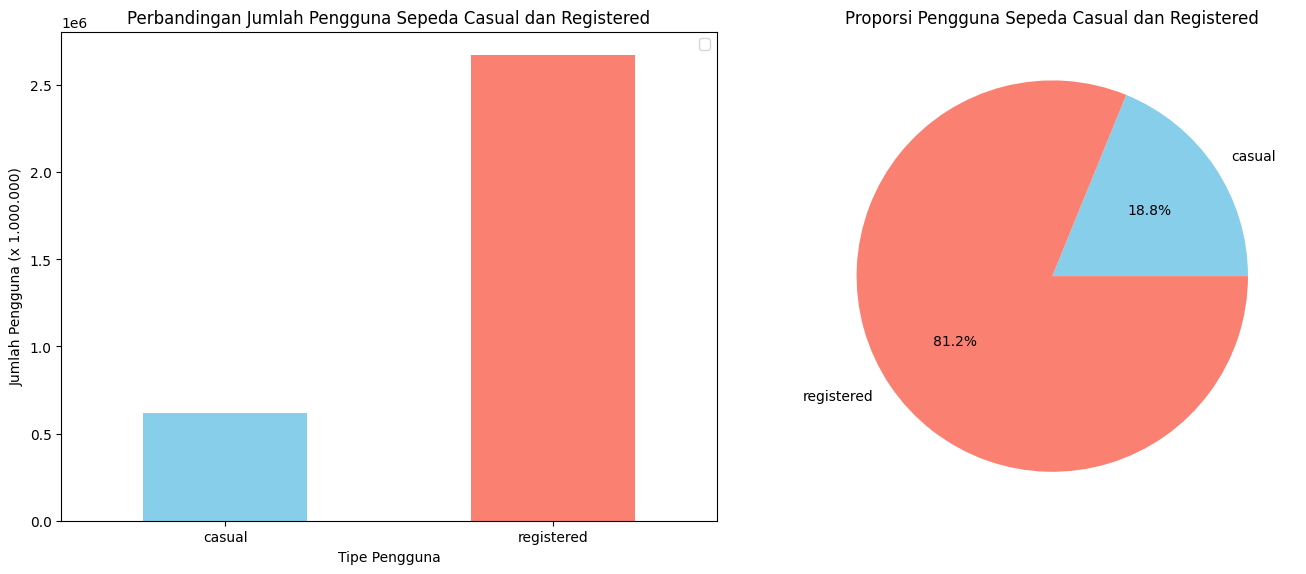

In [51]:
# Pertanyaan Nomor 1
# Membuat dataframe baru untuk menyimpan total pengguna casual dan registered
users_type = day_data[['casual', 'registered']].sum()

# Mengatur parameter visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi diagram batang
users_type.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'], rot=0)
axes[0].set_title('Perbandingan Jumlah Pengguna Sepeda Casual dan Registered')
axes[0].set_xlabel('Tipe Pengguna')
axes[0].set_ylabel('Jumlah Pengguna (x 1.000.000)')
axes[0].legend(title='')

# Visualisasi diagram lingkaran
users_type.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['skyblue', 'salmon'])
axes[1].set_title('Proporsi Pengguna Sepeda Casual dan Registered')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

Bagaimana karakteristik dan perbandingan tren jumlah pengguna sepeda yang berbeda antara casual dan registered?

Jadi diatas dengan tabel terlihat akan adanya grafik yang menunjukkan pengguna registered iitu lebih banyak dari pengguna casual dan menunjukkan tingkat persen yang mana bisa digunakan untuk acuan data pengguna registered maupun casual

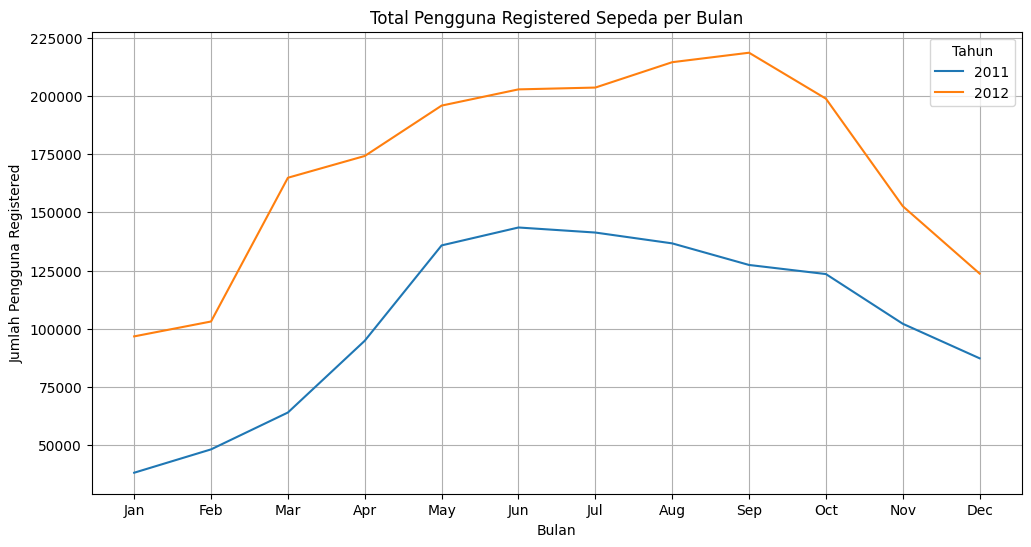

In [52]:
# Pertanyaan nomor 2
#Total pengguna setiap bulan
day_data['year'] = pd.to_datetime(day_data['dateday']).dt.year
day_data['month'] = pd.to_datetime(day_data['dateday']).dt.month

# Menghitung jumlah total pengguna casual, registered, dan total pengguna per bulan
users_by_month = day_data.groupby(by=["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",  # Menggunakan 'cnt' sebagai pengganti 'count'
}).reset_index()

# Plot total pengguna casual, registered, dan total pengguna per bulan
plt.figure(figsize=(12, 6))
for year in users_by_month['year'].unique():
    data_year = users_by_month[users_by_month['year'] == year]
    plt.plot(data_year['month'], data_year['count'], label=str(year))  # Menggunakan 'cnt' sebagai pengganti 'count'

plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna Registered")
plt.title("Total Pengguna Registered Sepeda per Bulan")
plt.legend(title="Tahun")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()


Bagaimana jumlah tren total pengguna registered dan total pengguna registered per bulan?

jadi untuk diatas menunjukkan adanya tren kenaikan dan penurunan dari segi pengguna registered.
Yang tertinggi yaitu terjadi di bulan september tahun 2012 yang berada diantara 200000 pengguna sampai 2500000 pengguna. jadi itu bisa digunakan acuan untuk data perusahaan agar pengguna registered itu bisa terus mengalami tren kenaikan

<ipython-input-53-3ad5469adbf4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_users_by_season.index, y="count", data=sorted_users_by_season, order=season_order, palette="autumn")


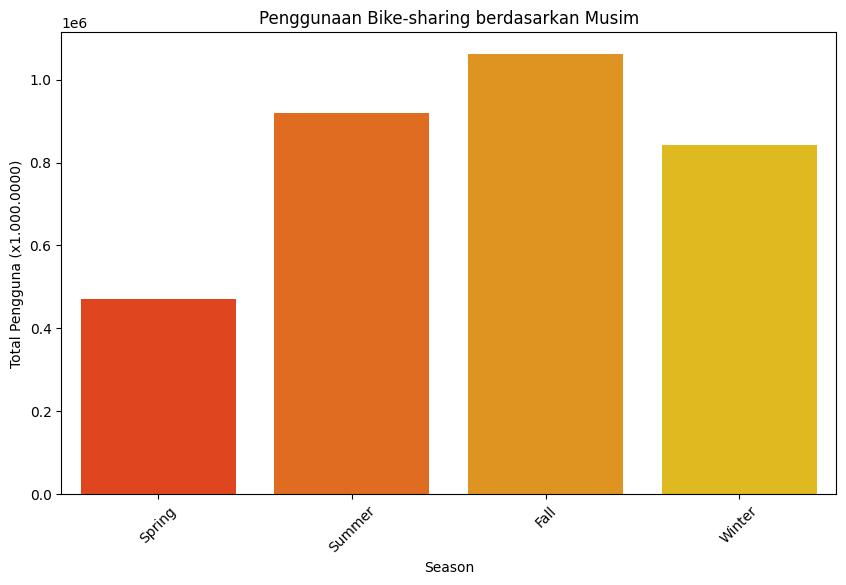

In [53]:
# Mengatur urutan musim berdasarkan konteks geografis atau kebiasaan lokal jika perlu
season_order = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_users_by_season.index, y="count", data=sorted_users_by_season, order=season_order, palette="autumn")
plt.title("Penggunaan Bike-sharing berdasarkan Musim")
plt.xlabel("Season")
plt.ylabel("Total Pengguna (x1.000.0000)")
plt.xticks(rotation=45)  # Rotasi label
plt.show()

Diatas adalah total pengaruh musim untuk pengguna bike sharing yang menunjukkan bahwa musim itu sangat berpengaruh terbukti dengan yang tingkat tertinggi yaitu season fall dan yang terendah itu pada season spring.

Pengguna bike sharing itu sangat terpengaruhi oleh season (musim) yang mana akan membuat pengguna itu mengalami kenaikan atau penurunan tergantung dengan musim yang ada karena menurut saya juga sesuai dengan data manusia itu dalam menggunakan sesuatu itu juga dipengaruhi oleh musim.